# Read the Data

In [1]:
import warnings
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('xtrain.txt', header = None, sep = '\t')
df.set_index(0, inplace = True)
df = df.transpose()

# Read the y values
df_y = pd.read_csv('ytrain.txt', header = None)
df_y.index = 1+np.arange(184)

# Concatenate both
df['y'] = df_y[0:]

In [3]:
df = df.astype({'y':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 184
Columns: 4655 entries, x10006_at to y
dtypes: category(1), float64(4654)
memory usage: 6.5 MB


In [4]:
# Save the data
df.to_csv('breast_genes.csv', index = False)

# Applying Different Models

In [5]:
x = df.drop(['y'], axis = 1).values
y = np.array(df.y.values)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [6]:
y_test.shape

(61,)

In [7]:
# Random Forest with default number of estimators
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(rf.score(x_test, y_test))
roc_auc_score(y_test, pred)

0.688524590164


0.61270022883295194

In [8]:
# RandomForest with 100 estimators
rf = RandomForestClassifier(n_estimators= 100, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(rf.score(x_test, y_test))
roc_auc_score(y_test, pred)

0.622950819672


0.50858123569794056

In [9]:
# SVM with default parameters
clf = SVC(random_state=42)
clf.fit(x_train, y_train)
len(clf.support_vectors_)
pred = clf.predict(x_test)
print(clf.score(x_test, y_test))
roc_auc_score(y_test, pred)

0.622950819672


0.5

In [10]:
# SVM with default parameters
clf = LinearSVC(random_state=42)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
pred = clf.predict(x_test)
roc_auc_score(y_test, pred)

0.704918032787


0.66018306636155599

In [11]:
# Logistic Regression with default parameters
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(lr.score(x_test, y_test))
roc_auc_score(y_test, pred)

0.737704918033


0.69508009153318084

In [12]:
# Logistic Regression with dual form 
lr = LogisticRegression(random_state=42, dual =True) # best one till now
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(lr.score(x_test, y_test))
roc_auc_score(y_test, pred)

0.770491803279


0.75572082379862704

In [13]:
# Logistic Regression with C = 0.01
# C : Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.

lr = LogisticRegression(random_state=42, C = 0.01)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(lr.score(x_test, y_test))
roc_auc_score(y_test, pred)

0.754098360656


0.69965675057208232

In [14]:
# KNN with default params
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(knn.score(x_test, y_test))
roc_auc_score(y_test, pred)

0.524590163934


0.45537757437070936

In [15]:
# SVM with polynomial kernel
clf = SVC(random_state=42 , C = 10, kernel = 'poly') # (sigmoid 62) and (rbf 65), (poly 70)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(len(clf.support_vectors_))
pred = clf.predict(x_test)
roc_auc_score(y_test, pred)

0.704918032787
112


0.66018306636155599

# Hyperparams Tuning for SVM

In [16]:

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
#     gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    degrees = [2, 3, 4, 5]
    param_grid = {'C': Cs, 'kernel' : kernels, 'degree': degrees}
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [17]:
# takes 4 min to run
# best_params = svc_param_selection(x, y, 10)
# best_params # were {'C': 10, 'degree': 2, 'kernel': 'rbf'}

In [18]:
clf = SVC(random_state=42 , C = 10, kernel = 'rbf')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
len(clf.support_vectors_)
pred = clf.predict(x_test)
roc_auc_score(y_test, pred)

0.655737704918


0.5778032036613272

In [19]:
clf = SVC(random_state=42 , C = 10, kernel = 'poly', degree = 7) 
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
len(clf.support_vectors_)
pred = clf.predict(x_test)
roc_auc_score(y_test, pred)

0.754098360656


0.71681922196796333

# Genetic Algorithm for choosing the best pipeline

In [20]:
# from tpot import TPOTClassifier

In [21]:
# auto_ml = TPOTClassifier(generations = 20, population_size = 100, scoring = 'balanced_accuracy', n_jobs = 4, random_state = 42, warm_start = True, verbosity = 2)
# auto_ml.fit(x_train, y_train)

In [22]:
# auto_ml.export('tpot_exported_pipeline.py')

In [23]:
# Best pipeline: 
# DecisionTreeClassifier(Normalizer(input_matrix, norm=max), criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4)

# Visualization

 PCA and t-SNE

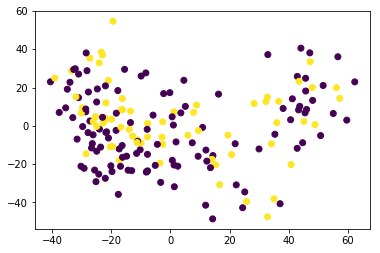

In [24]:


pca = PCA(n_components=3)
pca_result = pca.fit_transform(x)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]


plt.scatter(df['pca-one'], df['pca-two'], c = df['y'])

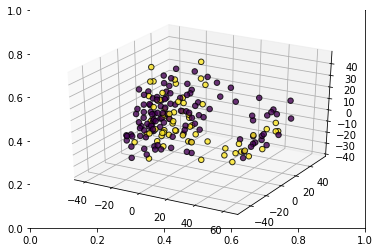

In [27]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')
ax.scatter(df['pca-one'], df['pca-two'], df['pca-three'], alpha=0.8, c=df.y, edgecolors='none', s=30)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 184 samples in 0.001s...
[t-SNE] Computed neighbors for 184 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 184 / 184
[t-SNE] Mean sigma: 28.928346
[t-SNE] KL divergence after 250 iterations with early exaggeration: 129.497543
[t-SNE] KL divergence after 300 iterations: 3.175815


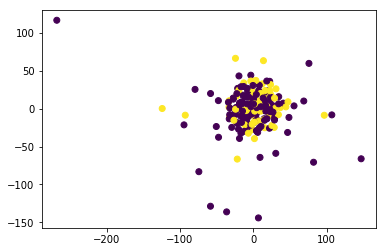

In [33]:
n_sne = 7000

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.drop(['y'], axis = 1).values)

plt.scatter(tsne_results[:,0], tsne_results[:,1], c = df['y'])

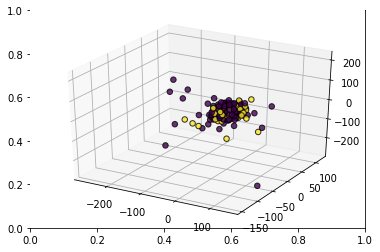

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')
ax.scatter(tsne_results[:,0], tsne_results[:,1], tsne_results[:,2], alpha=0.8, c=df.y, edgecolors='none', s=30)